# MNIST Dataset


In [2]:
from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784', version=1,as_frame=False)
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())
X, y = mnist['data'], mnist['target']
print(X.shape)


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(70000, 784)


In [2]:
X


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


5


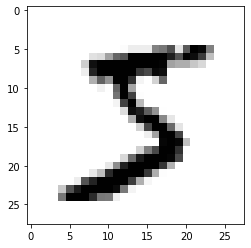

In [22]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
some_digit = np.array(X[0])
img = some_digit.reshape(28, 28)
plt.imshow(img, cmap='binary')
print(y[0])


In [4]:
import numpy as np
X = np.array(X)
# X[0]
y = y.astype(np.uint8)


In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# len(X_train)
# len(X_test)
# len(y_train)
# len(y_test)


### **Training simple classifier on MNIST dataset**


In [6]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)


SGDClassifier()

Accuracy


In [7]:
from sklearn.model_selection import cross_val_score, cross_val_predict
y_pred = cross_val_score(sgd, X_train, y_train, cv=3, scoring='accuracy')


In [8]:
y_pred_score = y_pred


In [9]:
y_pred = cross_val_predict(sgd, X_train, y_train)


Confusion Matrix


In [10]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
conf = confusion_matrix(y_train, y_pred)
recall = recall_score(y_train, y_pred, average='macro')
f1_scr = f1_score(y_train, y_pred, average='macro')
print(conf)
print(recall)
print(f1_scr)


[[5343    1   67   74    8  193  128    4   96    9]
 [   1 6399   81   51   11   53   17    8  108   13]
 [  23   47 5195  175   52   50  135   50  208   23]
 [  10   24  203 5340   12  292   34   32  102   82]
 [  10   32   62   32 5081   35  106   24   94  366]
 [  44   21   61  421   70 4231  200   15  242  116]
 [  22   15   71   16   30  134 5593    3   33    1]
 [  16   27  121  160   85   47    8 5272   54  475]
 [  20  138  193  489   57  563   79   10 4140  162]
 [  25   26   40  197  335  155    4  131  101 4935]]
0.8568047392010856
0.8569258404089538


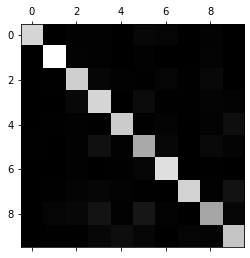

In [11]:
from matplotlib import pyplot as plt

plt.matshow(conf,cmap=plt.cm.gray)


### **Training model with data augmentation and Hyperparameter tuning**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
knn.predict([some_digit])

array([5], dtype=uint8)

In [28]:
y_knn_pred=cross_val_predict(knn,X_train,y_train,cv=3)

In [29]:
f1_score(y_train,y_knn_pred,average='macro')

0.9672164755274896

Grid search for hyperparameter tuning 

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

param_grid = {
    'n_neighbors': [4, 5, 7, 9, 10],
    'weights': ['uniform', "distance"]
}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid=param_grid,
                    scoring='f1_micro', cv=5, verbose=3,n_jobs=2)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.97041667 0.96778333 0.969
 0.96616667 0.96743333 0.96486667 0.9671    ]
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'n_neighbors': [4, 5, 7, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro', verbose=3)

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.9704166666666667
{'n_neighbors': 5, 'weights': 'distance'}


In [23]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

knn.fit(X_train,y_train)
knn.predict([some_digit])


array([5], dtype=uint8)